## Sagnac Frequency - MLTI Statistics

Explore the statistics of the MLTI boosts

## Imports

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime, date
from pandas import DataFrame, read_pickle, date_range, concat, read_csv
from obspy import UTCDateTime, read, Trace
from scipy.signal import hilbert


In [2]:
from functions.load_mlti import __load_mlti
from functions.get_mlti_intervals import __get_mlti_intervals
from functions.load_beat import __load_beat

In [4]:
if os.uname().nodename == 'lighthouse':
    root_path = '/home/andbro/'
    data_path = '/home/andbro/kilauea-data/'
    archive_path = '/home/andbro/freenas/'
    bay_path = '/home/andbro/bay200/'
elif os.uname().nodename == 'kilauea':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'
elif os.uname().nodename == 'lin-ffb-01':
    root_path = '/home/brotzer/'
    data_path = '/import/kilauea-data/'
    archive_path = '/import/freenas-ffb-01-data/'
    bay_path = '/bay200/'

## Configurations

In [6]:
config = {}

config['tbeg'] = UTCDateTime("2023-12-01 00:00")
config['tend'] = UTCDateTime("2023-12-31 00:00")

config['path_to_figs'] = data_path+"sagnac_frequency/figures/"

## Load MLTI times

Load MLTI logfiles for rings

In [7]:
mltiU = __load_mlti(config['tbeg'], config['tend'], "U", archive_path)

In [8]:
mltiZ = __load_mlti(config['tbeg'], config['tend'], "Z", archive_path)

In [9]:
mltiV = __load_mlti(config['tbeg'], config['tend'], "V", archive_path)

Generate time intervals of MLTI boosts from log files

In [10]:
mltiU_t1, mltiU_t2 = __get_mlti_intervals(mltiU.time_utc, time_delta=50)
mltiZ_t1, mltiZ_t2 = __get_mlti_intervals(mltiZ.time_utc, time_delta=50)
mltiV_t1, mltiV_t2 = __get_mlti_intervals(mltiV.time_utc, time_delta=50)

Compute Inter MLTI durations

In [12]:
durationU = mltiU_t2 - mltiU_t1
durationV = mltiV_t2 - mltiV_t1
durationZ = mltiZ_t2 - mltiZ_t1

### Plotting

(array([955.,   2.,   5.,   5.,   5.,   4.,   0.,   2.,   1.,   2.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

(array([260.,   2.,   0.,   2.,   0.,   0.,   3.,   1.,   0.,   1.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

(array([284.,   5.,   2.,   1.,   0.,   1.,   0.,   0.,   0.,   0.]),
 array([  0.,  30.,  60.,  90., 120., 150., 180., 210., 240., 270., 300.]),
 <BarContainer object of 10 artists>)

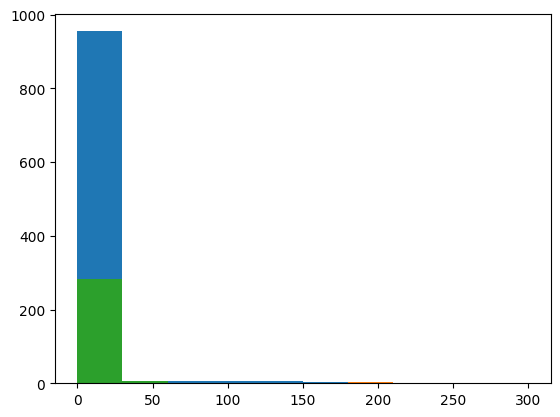

In [13]:
plt.hist(durationU/30, bins=10, range=(0, 300))
plt.hist(durationV/30, bins=10, range=(0, 300))
plt.hist(durationZ/30, bins=10, range=(0, 300))